**Imports**

In [1]:
import numpy as np
import pandas as pd
import pydataset
import matplotlib.pyplot as plt #For saving images

import pyplotterlib.standard.plotters as ppl


**Import and process example data**

In [2]:
#Get + sort the data in the frame
DF = pydataset.data(item="Florida")
DF.reset_index(inplace=True)
DF["county"] = DF["index"].to_list()
DF["gorePct"] = (DF["GORE"]/DF["Total"])*100
DF["bushPct"] = (DF["BUSH"]/DF["Total"])*100

#Sort by gore/bush percentages
goreDF = DF.sort_values("gorePct", ascending=False) #High gore percent->low gore percent
bushDF = DF.sort_values("bushPct", ascending=False) #High bush percent -> low bush percent

#Get values for top 3/bottom 3 for gore/bush
topThreeCountiesEach = goreDF["county"].to_list()[:3] + bushDF["county"].to_list()[:3]
_topThreeDataFrame = pd.concat(  [goreDF.head(3),bushDF.head(3)]  )

_goreData = _topThreeDataFrame["gorePct"].to_numpy()
_bushData = _topThreeDataFrame["bushPct"].to_numpy()

plotData = [_goreData, _bushData]

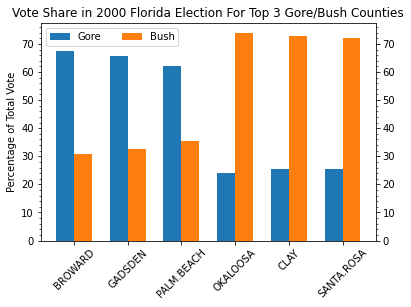

In [3]:
kwargDict = {"dataLabels":["Gore", "Bush"],
             "groupLabels": topThreeCountiesEach,
             "groupLabelRotation":45,
             "legendNumbCols":2,
             "plotData1D": plotData,
             "showLegend":True,
             "showMinorTickMarkers":True,
             "showTicksAndLabelsOnSides.right":True,
             "titleStr":"Vote Share in 2000 Florida Election For Top 3 Gore/Bush Counties",
             "yLabelStr":"Percentage of Total Vote"
            }
templPlotter = ppl.BarPlotter(**kwargDict)

_unused = templPlotter.createPlot()
plt.savefig("barPlotterA_imgA")

**Create a horizontal plot for good measure**

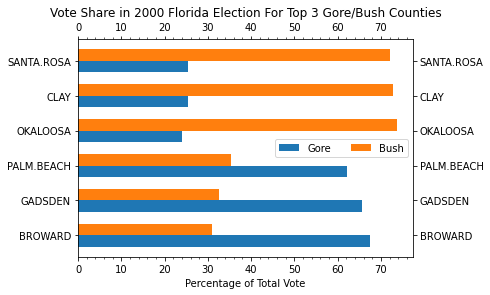

In [4]:
overideKwargs = {"plotHorizontally":True,
                 "groupLabelRotation":0,
                 "showTicksAndLabelsOnSides.top":True,
                 "xLabelStr":"Percentage of Total Vote",
                 "yLabelStr":None}

_unused = templPlotter.createPlot(**overideKwargs)
plt.savefig("barPlotterA_imgB")